In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Define the paths to your image and csv folders
trainValdDir = "/content/drive/MyDrive/Colab Notebooks/charts/charts/train_val"
testDr = "/content/drive/MyDrive/Colab Notebooks/charts/charts/test"
trainPathLab = "/content/drive/MyDrive/Colab Notebooks/charts/charts/train_val.csv"
trainValdLab = pd.read_csv(trainPathLab)

In [26]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(trainValdDir):
 if filename.endswith('.png'):
 # Load the images and resize them to (128, 128) with 3 color channels
  img = cv2.imread(os.path.join(trainValdDir, filename))
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = Image.open(os.path.join(trainValdDir, filename))
  imageArr = np.array(img)
 # Append the array to the list of images
  images.append(imageArr)
  labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [27]:
x_train.shape

(1000, 128, 128, 3)

In [28]:
x_train[:5]
y_train[:5]

array([10,  8,  9,  7,  2])

In [29]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(testDr):
 if filename.endswith('.png'):
 # Load the images and resize them to (128, 128) with 3 color channels
  img = cv2.imread(os.path.join(testDr, filename))
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = Image.open(os.path.join(testDr, filename))
  imageArr = np.array(img)
 # Append the array to the list of images
  images.append(imageArr)
  labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays

In [30]:
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [31]:
x_test.shape

(50, 128, 128, 3)

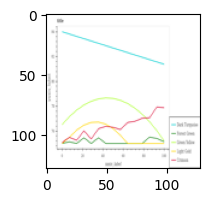

In [32]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [33]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in trainValdLab['type']])

In [34]:
y_train
y_train.shape
y_test.shape

(50,)

In [35]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
 plt.figure(figsize = (10,2))
 plt.imshow(x[index])
# image_label = trainValdLab.iloc[index]['type']
# plt.xlabel(image_label)
 plt.xlabel(image_classes[y[index]])

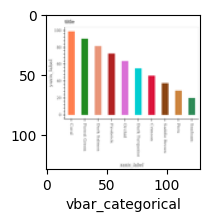

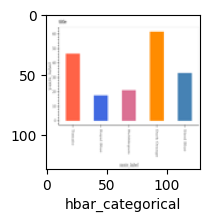

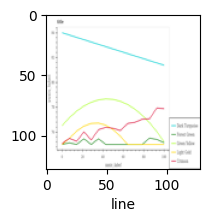

In [36]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [37]:
# now we have mapped the corresponding labels to the image

In [38]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [39]:

x_test.shape

(1000, 128, 128, 3)

In [40]:
# take the label for train data from csv file
yTrainInd = trainValdLab['image_index']
y_train_type = trainValdLab['type']

In [41]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [42]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 43s 1s/step - loss: 5.8155 - accuracy: 0.2200
Epoch 2/10
32/32 [==============================] - 34s 1s/step - loss: 1.6161 - accuracy: 0.2200
Epoch 3/10
32/32 [==============================] - 33s 1s/step - loss: 1.6080 - accuracy: 0.2380
Epoch 4/10
32/32 [==============================] - 35s 1s/step - loss: 1.5730 - accuracy: 0.2700
Epoch 5/10
32/32 [==============================] - 35s 1s/step - loss: 1.5674 - accuracy: 0.2720
Epoch 6/10
32/32 [==============================] - 33s 1s/step - loss: 1.5726 - accuracy: 0.2290
Epoch 7/10
32/32 [==============================] - 37s 1s/step - loss: 1.5907 - accuracy: 0.2380
Epoch 8/10
32/32 [==============================] - 33s 1s/step - loss: 1.6066 - accuracy: 0.2460
Epoch 9/10
32/32 [==============================] - 33s 1s/step - loss: 1.5877 - accuracy: 0.2480
Epoch 10/10
32/32 [==============================] - 35s 1s/step - loss: 1.5760 - accuracy: 0.2580


In [43]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [44]:
model.evaluate(x_test,y_test)


7/7 [==============================] - 2s 254ms/step - loss: 1.5962 - accuracy: 0.1900


[1.5962469577789307, 0.1899999976158142]

In [45]:
y_pred = model.predict(x_test)
y_pred
yPredictClass = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,yPredictClass))

7/7 [==============================] - 2s 252ms/step


In [46]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [47]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 19s 19s/step - loss: 1.6113 - accuracy: 0.2225 - val_loss: 2.5355 - val_accuracy: 0.1850
Epoch 2/50
1/1 [==============================] - 15s 15s/step - loss: 2.3123 - accuracy: 0.2037 - val_loss: 1.8197 - val_accuracy: 0.1850
Epoch 3/50
1/1 [==============================] - 15s 15s/step - loss: 1.7259 - accuracy: 0.2425 - val_loss: 1.5777 - val_accuracy: 0.1850
Epoch 4/50
1/1 [==============================] - 16s 16s/step - loss: 1.5701 - accuracy: 0.2450 - val_loss: 1.5455 - val_accuracy: 0.4900
Epoch 5/50
1/1 [==============================] - 15s 15s/step - loss: 1.5561 - accuracy: 0.4275 - val_loss: 1.5237 - val_accuracy: 0.3850
Epoch 6/50
1/1 [==============================] - 18s 18s/step - loss: 1.5329 - accuracy: 0.3250 - val_loss: 1.4974 - val_accuracy: 0.3650
Epoch 7/50
1/1 [==============================] - 16s 16s/step - loss: 1.4911 - accuracy: 0.4062 - val_loss: 1.5315 - val_accuracy: 0.2400
Epoch 8/50
1/1 [===========

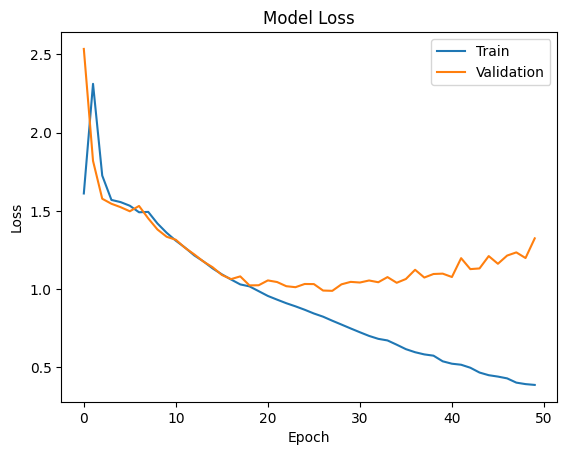

In [48]:
# modify the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [49]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 153ms/step - loss: 1.3245 - accuracy: 0.6350


[1.3244500160217285, 0.6349999904632568]

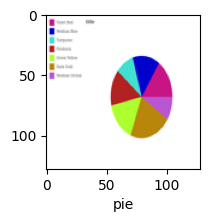

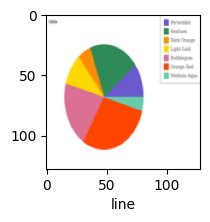

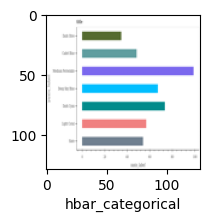

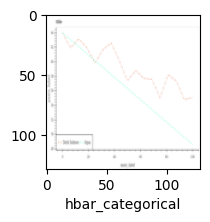

In [50]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [51]:
# Observation: we can see some wrong predictions

In [52]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 118ms/step


array([[3.85207057e-01, 3.01603526e-01, 2.46771321e-01, 8.36741645e-03,
        5.80506139e-02],
       [1.23114601e-01, 6.35309289e-06, 8.61166482e-05, 3.45792813e-07,
        8.76792550e-01],
       [1.84567243e-01, 1.04105944e-04, 6.74622948e-04, 8.06209573e-05,
        8.14573348e-01],
       [2.17862598e-05, 3.97842603e-09, 8.20428395e-05, 3.88865192e-06,
        9.99892175e-01],
       [3.24503511e-01, 4.59819049e-01, 1.56901747e-01, 8.08333512e-03,
        5.06924689e-02]], dtype=float32)

In [53]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 4, 1]

In [54]:
y_test[:5]


array([0, 4, 4, 4, 0])

In [55]:
# here we see some values are not matching

'dot_line'

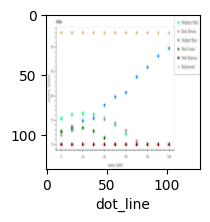

In [56]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [57]:

# some values are not matching

In [58]:

print("classification report: \n", classification_report(y_test,y_classes))


classification report: 
               precision    recall  f1-score   support

           0       0.58      0.57      0.58        37
           1       0.89      0.75      0.81        44
           2       0.73      0.33      0.46        48
           3       0.42      0.67      0.51        33
           4       0.67      0.92      0.78        38

    accuracy                           0.64       200
   macro avg       0.66      0.65      0.63       200
weighted avg       0.68      0.64      0.63       200



In [59]:
# Generate the confusion matrix
confsnMatrix = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(confsnMatrix)

Confusion Matrix:
[[21  4  1  2  9]
 [ 2 33  0  6  3]
 [ 9  0 16 22  1]
 [ 2  0  5 22  4]
 [ 2  0  0  1 35]]


Text(95.72222222222221, 0.5, 'Actual')

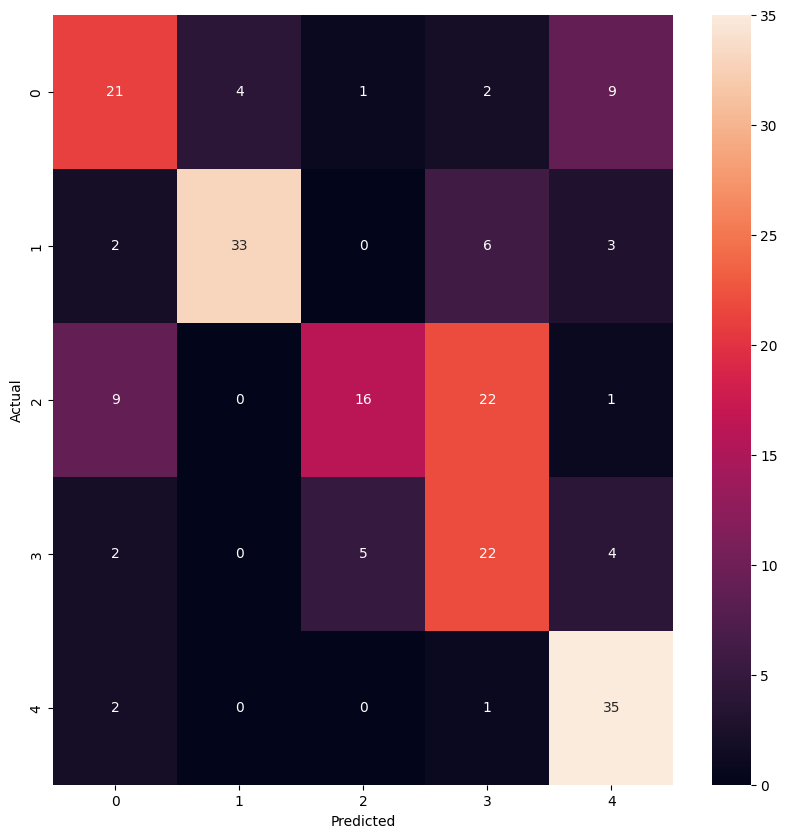

In [60]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(confsnMatrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [61]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [71]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [63]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [64]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
 layer.trainable = False


In [65]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [67]:
# Set up data generators for image augmentation and feeding data to the model
dataGenerTrain = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
dataGenTest = ImageDataGenerator(rescale=1./255)

In [68]:

# flow method generates batches of augmented data
train_generator = dataGenerTrain.flow(x_train, y_train, batch_size=32)
test_generator = dataGenerTrain.flow(x_test, y_test, batch_size=32)

In [105]:
# Train the model with early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])